In [ ]:
# Import Libraries
# !pip install scikeras
import pandas as pd # Data manipulation & analysis
import numpy as np # Numerical calculations
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # data Visualization - high level
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# Removing warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#https://docs.google.com/spreadsheets/d/15dkubd2UkW8X-XDwVMemAtoIuMyR7-mX/edit?usp=sharing&ouid=106388932147889721850&rtpof=true&sd=true

In [ ]:
# Install PyDrive & import modules to authenticate and access Google Drive
# !pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate user & set up Google authentication
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download the file content(dataset) & save it as "Tourism.xlsx"
fileDownloaded = drive.CreateFile({"id":"15dkubd2UkW8X-XDwVMemAtoIuMyR7-mX"})
fileDownloaded.GetContentFile('Tourism.xlsx')

In [ ]:
# Read 'Tourism.xlsx' into a pandas dataframe.
tourism_df = pd.read_excel('/content/Tourism.xlsx','Tourism')
tourism_df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


#**Understanding Data**

In [ ]:
# Shows first 5 rows of the dataset - to see what data is
tourism_df.head() 

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
# Shows last 5 rows of dataset - to see what data is
tourism_df.tail() 

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [ ]:
# Displays all the columns present in the dataset
tourism_df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [ ]:
# Shows number of rows & columns in the dataset
tourism_df.shape 

(4888, 20)

In [ ]:
# Information of dataset - total number of rows and columns, datatypes, memory usage of dataframe, non null values
tourism_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
#dropping null values
new_tourism=tourism_df.dropna()

In [ ]:
# Checks if there are any Null values in the dataset
new_tourism.isnull().sum().sort_values(ascending=False)

CustomerID                  0
ProdTaken                   0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
PreferredPropertyStar       0
ProductPitched              0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
Age                         0
MonthlyIncome               0
dtype: int64

In [ ]:
#checking shape of data after dropping null values
new_tourism.shape

(4128, 20)

In [ ]:
#changing data type of categorical column from object to category and float to int "When needed"
new_tourism['Age']=new_tourism['Age'].astype('int')
new_tourism['NumberOfFollowups']=new_tourism['NumberOfFollowups'].astype('int')
new_tourism['NumberOfTrips']=new_tourism['NumberOfTrips'].astype('int')
new_tourism['NumberOfChildrenVisiting']=new_tourism['NumberOfChildrenVisiting'].astype('int')
new_tourism['TypeofContact']=new_tourism['TypeofContact'].astype('category')
new_tourism['Occupation']=new_tourism['Occupation'].astype('category')
new_tourism['Gender']=new_tourism['Gender'].astype('category')
new_tourism['ProductPitched']=new_tourism['ProductPitched'].astype('category')
new_tourism['MaritalStatus']=new_tourism['MaritalStatus'].astype('category')
new_tourism['Designation']=new_tourism['Designation'].astype('category')

# **Feature Engineering**

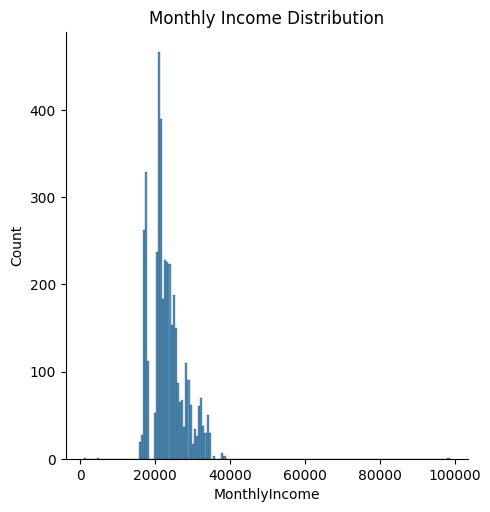

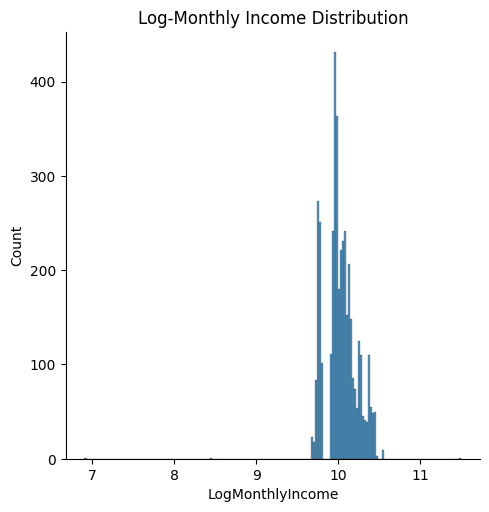

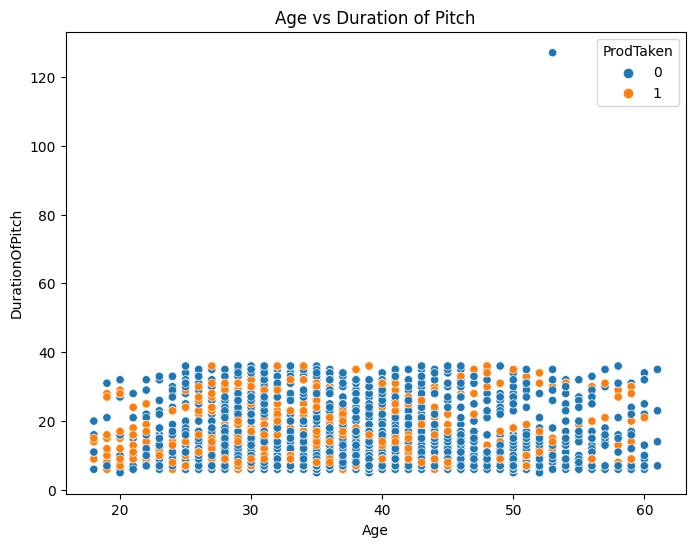

ValueError: ignored

<Figure size 800x600 with 0 Axes>

In [ ]:
# Distribution of MonthlyIncome
sns.displot(new_tourism['MonthlyIncome'])
plt.title('Monthly Income Distribution')
plt.show()

# Apply log transformation to MonthlyIncome to normalize the distribution
new_tourism['LogMonthlyIncome'] = new_tourism['MonthlyIncome'].apply(lambda x: np.log(x + 1))

# Visualize the distribution after transformation
sns.displot(new_tourism['LogMonthlyIncome'])
plt.title('Log-Monthly Income Distribution')
plt.show()

# Relationship between Age and DurationOfPitch
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='DurationOfPitch', hue='ProdTaken', data=new_tourism)
plt.title('Age vs Duration of Pitch')
plt.show()

# Boxplot of DurationOfPitch based on MaritalStatus
plt.figure(figsize=(8, 6))
sns.boxplot(x='MaritalStatus', y='DurationOfPitch', data=new_tourism)
plt.title('Duration of Pitch by Marital Status')
plt.show()

# 4. Distribution of NumberOfTrips
sns.countplot(x='NumberOfTrips', data=new_tourism)
plt.title('Number of Trips Distribution')
plt.show()

# Correlation heatmap
corr = new_tourism.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='Greens', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Count of customers by Occupation
plt.figure(figsize=(8, 6))
sns.countplot(x='Occupation', data=new_tourism)
plt.title('Count of Customers by Occupation')
plt.xticks(rotation=45)
plt.show()

# Count of customers by TypeofContact
plt.figure(figsize=(6, 4))
sns.countplot(x='TypeofContact', data=new_tourism)
plt.title('Count of Customers by Type of Contact')
plt.show()

# Count of customers by CityTier
plt.figure(figsize=(6, 4))
sns.countplot(x='CityTier', data=new_tourism)
plt.title('Count of Customers by City Tier')
plt.show()

# Count of customers by ProductPitched
plt.figure(figsize=(8, 6))
sns.countplot(x='ProductPitched', data=new_tourism)
plt.title('Count of Customers by Product Pitched')
plt.xticks(rotation=45)
plt.show()

# Count of customers by Designation
plt.figure(figsize=(8, 6))
sns.countplot(x='Designation', data=new_tourism)
plt.title('Count of Customers by Designation')
plt.xticks(rotation=45)
plt.show()

# Count of customers by Gender and MaritalStatus
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='MaritalStatus', data=new_tourism)
plt.title('Count of Customers by Gender and Marital Status')
plt.show()

# Boxplot of LogMonthlyIncome by Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='LogMonthlyIncome', data=new_tourism)
plt.title('Log-Monthly Income by Occupation')
plt.xticks(rotation=45)
plt.show()

# Pairplot for selected features
selected_features = ['LogMonthlyIncome', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'PitchSatisfactionScore', 'ProdTaken']
sns.pairplot(new_tourism[selected_features], hue='ProdTaken', corner=True)
plt.show()


In [ ]:
# creating dummy values for categorical columns so that it can be used further
new_tourism=pd.get_dummies(new_tourism,prefix_sep='_',drop_first=True)
new_tourism.head()

In [ ]:
#S plitting data into train and test
X=new_tourism.loc[:,new_tourism.columns!='ProdTaken']
y=new_tourism['ProdTaken']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(3302, 31)

In [ ]:
# scaling data so that model can give better result
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.44784342, -1.21418566,  0.36446469, ..., -0.72468835,
        -0.46112159, -0.15857954],
       [-1.39633209,  0.52456849, -0.7226739 , ...,  1.37990351,
        -0.46112159, -0.15857954],
       [ 1.53926181,  2.04597837, -0.7226739 , ..., -0.72468835,
         2.16862539, -0.15857954],
       ...,
       [ 0.85543438,  2.37199477,  1.45160329, ..., -0.72468835,
        -0.46112159, -0.15857954],
       [ 1.38690277, -0.23613645, -0.7226739 , ..., -0.72468835,
        -0.46112159, -0.15857954],
       [-1.03582056, -0.56215285, -0.7226739 , ...,  1.37990351,
        -0.46112159, -0.15857954]])

In [ ]:
# converting data to float type so we can feed it to neural network
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

# expanding dimension of data
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

X_train.shape
X_test.shape

(826, 31, 1)

In [ ]:

# define the logistic regression model
estimator = LogisticRegression()

# reshape the input data
X_train = X_train.reshape(X_train.shape[0], -1)

# architecture of model
model=Sequential()
model.add(Dense(30,input_shape=(31,),activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

# compiling model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# fitting model
model.fit(X_train,y_train,epochs=100,batch_size=100)

# kfold verification
KFold= StratifiedKFold(n_splits=10,shuffle=True)
result=cross_val_score(estimator,X_train,y_train,cv=KFold)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 0.6897 - accuracy: 0.5733
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.5254 - accuracy: 0.7617
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8050
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4351 - accuracy: 0.8192
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.4179 - accuracy: 0.8271
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4052 - accuracy: 0.8274
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3950 - accuracy: 0.8325
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 0.3879 - accuracy: 0.8340
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8349
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 0.3765 - accuracy: 0.8389
Epoch 11/

In [ ]:
# mean accuracy of result
result.mean()*100

83.88894992218255